# Assignment 3: Non-Linear Classification with SVM

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia

In this assignment, you will implement your own version of SVM with kernels to classify non-linear data. For references, you may refer to my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) or Chapter 5 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_svm.ipynb**.


## 1. DATA SET AND VISUALIZATION FUNCTION
We will use the non-linear toy data called the Moon dataset. You may use the code snippet below to generate the train/test set. Feel free to change the number of samples, and noise level. Additionally, a function plot_svm() is provided to help you visualize the decision boundary, margin, and support vectors on the dataset in 2D feature space.

The provided function plot_svm() works out-the-box, and is the best way to visualize and evaluate the performance of your model. It assumes the classifier has an instance variable "self.support_vectors_", which is a numpy array of the support vectors found in training. DO NOT modify this function. Once your implementation in Task 3 is complete, the plots generated for your model should look similar to the plots generated for the standard library models in Task 2. 

In [17]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
import numpy as np


X, y = make_moons (n_samples = 500, noise = 0.15, random_state = 49)
y = y*2-1.0 # convert the labels from {0,1} to {-1, +1}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

import matplotlib.pyplot as plt

def plot_svm (clf, X, y, axes=[-2, 3, -2, 2]):
    """
    Generate a simple plot of SVM including the decision boundary, margin, and its training data
    
    Parameters
    ----------
    clf: your classifier handle
    X: feature matrix shape(m_samples, n_features)
    y: label vector shape(m_samples, )
    axes: (optional) the axes of the plot in format [xmin, xmax, ymin, ymax] 
    """
    # Create a mesh grid based on the provided axes (100 x 100 resolution)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s) # create a mesh grid
    X_mesh = np.c_[x0.ravel(), x1.ravel()] # convert all mesh points into 2-D points
    y_pred = clf.predict(X_mesh).reshape(x0.shape) # predict then covert back to the 2-D
    y_decision = clf.decision_function(X_mesh).reshape(x0.shape)

    plt.figsize=(16, 9)
    plt.plot(X[:, 0][y==-1], X[:, 1][y==-1], "bo", label="Class -1")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "go", label="Class +1")
    # Plot out the support vectors (in red)
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1], s=80, c="r", label="Support Vectors")
    # Plot decision boundary and margins
    plt.contourf(x0,x1, y_pred, cmap = plt.cm.brg, alpha = 0.1)
    plt.contourf(x0,x1, y_decision, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, colors='k',
                 levels=[-1, 0, 1], alpha=0.5,
                 linestyles=['--', '-', '--'])
    plt.legend(loc="lower right")
    plt.axis("auto")

    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0) 
    plt.show()

    # Sid: added this part so we could just get the classification report as part of the
    # plot_svm function

    print(classification_report(y_test, clf.predict(X)))

- - -
## 2. TRAIN SVM FOR CLASSIFICATION TASK 

Use the standard libarary SVM classifier (SVC) on the training data, and then test the classifier on the test data. You will need to call SVM with 3 kernels: (1) Linear, (2) Polynomial and (3) Gaussian RBF. 

You should tune each model using a grid search or similar hyperparameter selection process, and report the best hyperparameters found. You will use these same hyperparameter settings later when testing and comparing to your implementation in Task 4. Once you've selected the best hyperparameters for each kernel, you will need to report the following:

* Confusion matrix, Recall, and Precision. If applicable, discuss any tuning process on C and/or gamma to get to a reasonable result.
* Use the provided plot_svm() to visualize the SVM in 2D. This might give you some insight on how SVM determines the margin and support vector on the Moon dataset.


Before we proceed, I want to scale/transform both the training and testing datasets because SVMs prefer those types of data. 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# note that we don't need to fit_transform the y data because they are classifiers. 

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# so lets create three SVMs, each for a different kernel
# and then lets tune each of them on the training data
SVMLinear = SVC(kernel='linear')
SVMPoly = SVC(kernel='poly')
SVMRBF = SVC(kernel='rbf')

Now lets fit/predict on all the data using each of the models and inspect the precision and recall. (Prior to tuning, then lets tune and do it again).

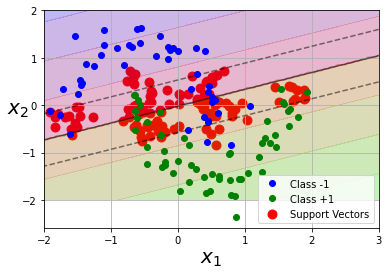

              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



In [20]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

SVMLinear.fit(X_train, y_train)
plot_svm(SVMLinear, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


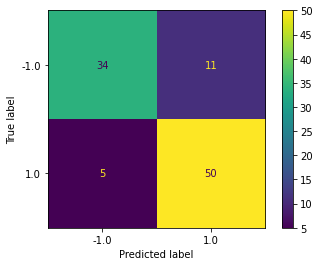

In [21]:
plot_confusion_matrix(SVMLinear, X_test, y_test)

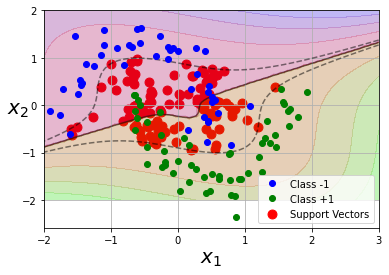

              precision    recall  f1-score   support

        -1.0       0.83      0.76      0.79        45
         1.0       0.81      0.87      0.84        55

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.82      0.82      0.82       100



In [22]:
SVMPoly.fit(X_train, y_train)
plot_svm(SVMPoly, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


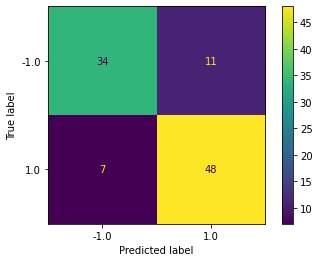

In [23]:
plot_confusion_matrix(SVMPoly, X_test, y_test)

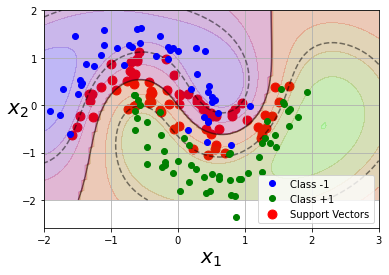

              precision    recall  f1-score   support

        -1.0       1.00      0.93      0.97        45
         1.0       0.95      1.00      0.97        55

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [24]:
SVMRBF.fit(X_train, y_train)
plot_svm(SVMRBF, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


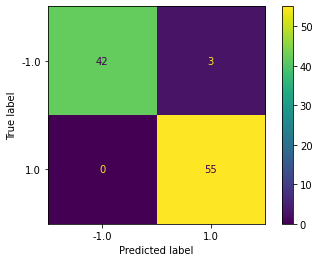

In [25]:
plot_confusion_matrix(SVMRBF, X_test, y_test)

A lot of these results are sensical. The ranking for each of the models is as such: 

1.   RBF
2.   Poly
3.   Linear

This makes sense as the RBF model is the most complex and is the most capable of accomadating nuances within the data. 

Now lets tune each of the models and see how they perform. 



In [26]:
param_grid_linear = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

param_grid_poly = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]} # applies only to poly and rbfpoly


param_grid_rbf = {'C': [0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]}

grid_linear = GridSearchCV(SVMLinear, param_grid_linear, refit = True, n_jobs = -1) # n_jobs=-1 uses all CPU cores
grid_poly = GridSearchCV(SVMPoly, param_grid_poly, refit = True, n_jobs = -1)
grid_rbf = GridSearchCV(SVMRBF, param_grid_rbf, refit = True, n_jobs = -1)

In [27]:
grid_linear.fit(X_train, y_train)
grid_poly.fit(X_train, y_train)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]})

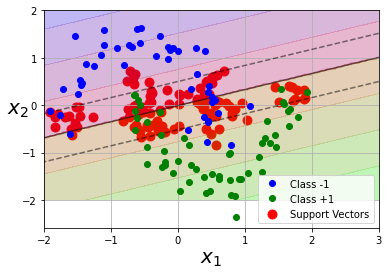

              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



{'C': 10}

In [28]:
plot_svm(grid_linear.best_estimator_, X_test, y_test)
grid_linear.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


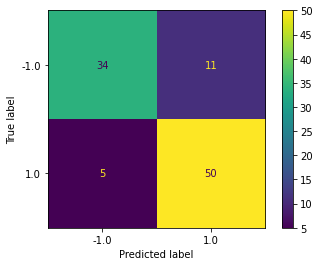

In [29]:
plot_confusion_matrix(grid_linear.best_estimator_, X_test, y_test)

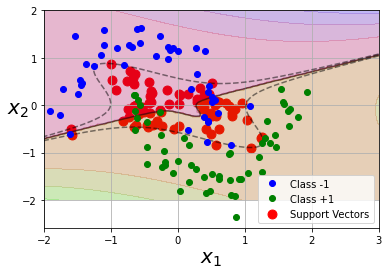

              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



{'C': 0.1, 'gamma': 10}

In [30]:
plot_svm(grid_poly.best_estimator_, X_test, y_test)
grid_poly.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


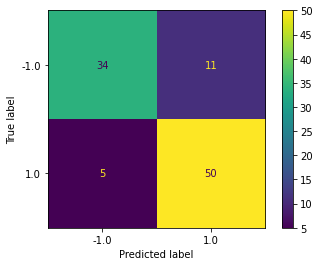

In [31]:
plot_confusion_matrix(grid_poly.best_estimator_, X_test, y_test)

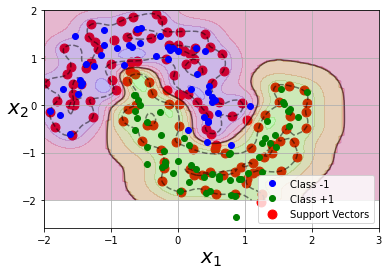

              precision    recall  f1-score   support

        -1.0       1.00      0.96      0.98        45
         1.0       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



{'C': 1, 'gamma': 10}

In [32]:
plot_svm(grid_rbf.best_estimator_, X_test, y_test)
grid_rbf.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


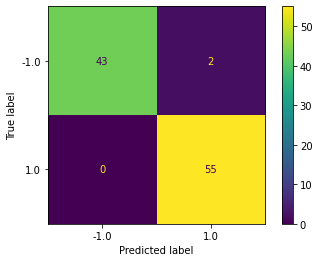

In [33]:
plot_confusion_matrix(grid_rbf.best_estimator_, X_test, y_test)

We can see how tuning offers us greate improvement in the poly and rbf SVMs with no improvement in the linear SVM. 

| Model      | Untuned | Tuned | 
| ----------- | ----------- | ---------- |
| SVMLinear      | 0.87, 0.76, 0.82, 0.91       | 0.87, 0.76, 0.82, 0.91 |
| SVMPoly   | 0.83, 0.76, 0.81, 0.87        | 0.85, 0.91, 0.92, 0.87 |
| SVMRBF   |  1.0, 0.93, 0.95, 1.0     | 1.0, 0.96, 0.96, 1.0  |

-1 prediction, -1 recall, 1 prediction, 1 recall

Looking at this table, we can see how we have no improvement in the linear model, significant improvements in the polynomial model, and marginal improvements in the RBF model particularly in -1 recall and 1 prediction. Note that I stick to the default degree of 3 because in the case of a polynomial estimator it doesn't make sense to increase the degree indefinetely as that will just result in the model overfitting the data so I stuck to the default degree of 3 which strikes a good medium between optimizing the model and avoiding overfitting. But we can look at higher degrees here: 

In [34]:
SVMPoly_4 = SVC(kernel='poly', degree=4)
SVMPoly_5 = SVC(kernel='poly', degree=5)
SVMPoly_6 = SVC(kernel='poly', degree=6)
SVMPoly_7 = SVC(kernel='poly', degree=7)

SVMPoly_4.fit(X_train, y_train)
SVMPoly_5.fit(X_train, y_train)
SVMPoly_6.fit(X_train, y_train)
SVMPoly_7.fit(X_train, y_train)

SVC(degree=7, kernel='poly')

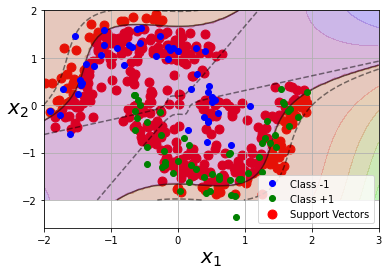

              precision    recall  f1-score   support

        -1.0       0.49      0.91      0.64        45
         1.0       0.76      0.24      0.36        55

    accuracy                           0.54       100
   macro avg       0.63      0.57      0.50       100
weighted avg       0.64      0.54      0.49       100



In [35]:
plot_svm(SVMPoly_4, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


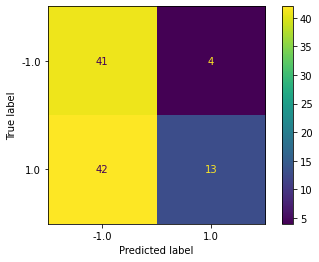

In [36]:
plot_confusion_matrix(SVMPoly_4, X_test, y_test)

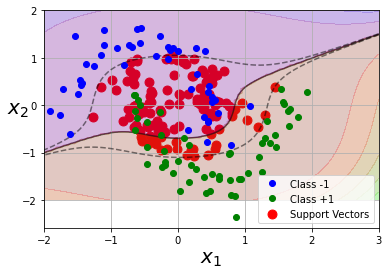

              precision    recall  f1-score   support

        -1.0       0.79      0.93      0.86        45
         1.0       0.94      0.80      0.86        55

    accuracy                           0.86       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



In [37]:
plot_svm(SVMPoly_5, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


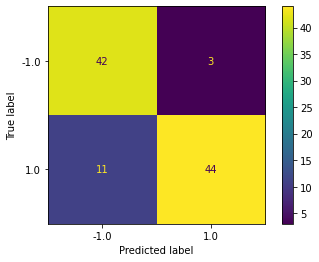

In [38]:
plot_confusion_matrix(SVMPoly_5, X_test, y_test)

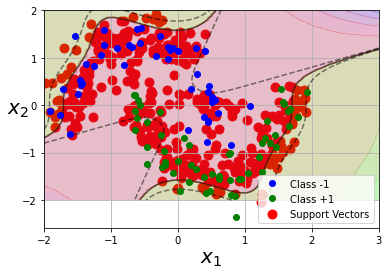

              precision    recall  f1-score   support

        -1.0       0.48      0.91      0.63        45
         1.0       0.73      0.20      0.31        55

    accuracy                           0.52       100
   macro avg       0.61      0.56      0.47       100
weighted avg       0.62      0.52      0.46       100



In [39]:
plot_svm(SVMPoly_6, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


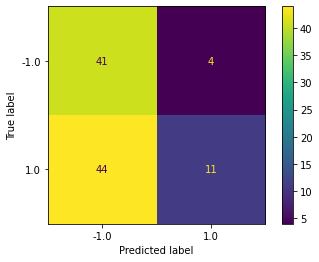

In [40]:
plot_confusion_matrix(SVMPoly_6, X_test, y_test)

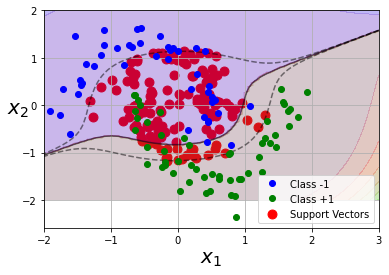

              precision    recall  f1-score   support

        -1.0       0.79      0.93      0.86        45
         1.0       0.94      0.80      0.86        55

    accuracy                           0.86       100
   macro avg       0.86      0.87      0.86       100
weighted avg       0.87      0.86      0.86       100



In [41]:
plot_svm(SVMPoly_7, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


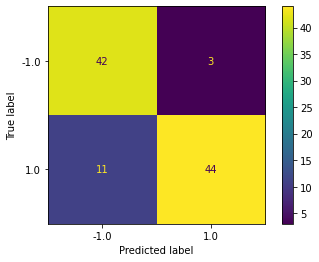

In [42]:
plot_confusion_matrix(SVMPoly_7, X_test, y_test)

As we can see here through manual testing, even numbered degrees perform very poorly. I believe that this has to do with how well curves are modeled by odd/even functions, so having an odd degree gives our model a little bit of a boost. But note that the confusion matrices between degree 3, 5, and 7 don't differ by too much. We have a performance boost via going to degrees 5 and 7 but between those too we don't see too much of a increase in performance. And although they are both better than degree 3, we have worse 1, recall and -1, precision but better -1, recall and 1, precision. But again not so significant that I would bother changing degrees.  

## 3. IMPLEMENT YOUR OWN NON-LINEAR SVM
Now that you see how the standard library SVM perform on the dataset, you will attempt to implement your own version of SVM. To help you, a template of SVM has been created including the quadratic optimization. Essensially, you will get the optimized value of $\alpha$ for free. Note that there are **6 subtasks** which you need to implement in order to get the SVM to work properly.

The provided code is extensively documented in comments, so that you may write code compatible with it. DO NOT edit the provided code, but read the comments and ask Piazza questions as necessary to understand it.

Many of these tasks are made much easier by a working knowledge of numpy. If you have something you want to do, but are unsure how to do it in Python, consult the numpy documentation here: https://numpy.org/doc/1.17/reference/index.html. If you haven't built a Python class before, it may be worth scanning this tutorial: https://www.datacamp.com/community/tutorials/python-oop-tutorial.

In [43]:
# Use the information from the lecture slides to formulate the SVM Kernels. 
# To help you get started, the Linear Kernel (simply just a dot product) has been provided to you. 
# These kernel functions will be called in the SVM class
# Linear Kernel             
def linear_kernel(u, v):
    return np.dot(u, v)

# Polynomial Kernel (of degree up to and including p)
def polynomial_kernel(u, v, p=3):
    # SUBTASK 1: Implement the kernel formulation here
    # Sid: this is detailed in Lecture 10b slide 29
    # I think we use degree up to d? instead of exactly d?
    return (np.dot(u, v))**p
    # Note: using "polynomials of degreee up to d" produces far better results
    # but the above value most closely emulates the behavior of default SVM
    # return (np.dot(u, v) + 1)**p

# Gaussian RBF Kernel
def rbf_kernel(u, v, gamma=10):
    # SUBTASK 2: Implement the kernel formulation here
    # Note that gamma is provided, not sigma; see the slides for the relationship between gamma and sigma
    # this came from Equation 5-10 in the textbook
    return np.exp( -1 * gamma * (np.linalg.norm(u - v) ** 2) )

In [44]:
import cvxopt # The optimization package for Quadratic Programming
import cvxopt.solvers
from sklearn.base import BaseEstimator, ClassifierMixin 
# extending these classes is required by all scikitlearn classes that will need fit, transform, and fit_transform functions
# this is what enables inclusion in pipelines and compatability with other scikitlearn structures and functions

class MySVM(BaseEstimator, ClassifierMixin):
    """The Implementation of the SVM class"""

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel # the kernel function used; this is a function and can be called
        self.C = C # make sure to set this when instantiating this class; is C is None, your performance will be weird
        if self.C is not None: self.C = float(self.C)
        self.K = None
        self.a = None
        self.support_vectors_ = []
        self.support_vectors_y = []
        self.support_vectors_lmults = []
        self.b = 0
        

    def fit(self, X, y=None):
        """
        Train SVM based on the training set
        Parameters
        ----------
        X: feature matrix shape(m_samples, n_features)
        y: label vector shape(m_samples, )
        """
        
        m_samples, n_features = X.shape

        # To speed up repeated applications of the kernel function, dynamic programming is used
        # All pairs of points have the kernel function computed over them and the result stored in K
        # K is indexed by indices in X, so K[i,j] = kernel_function(X[i], X[j])
        # You may use K in your code later in this function, but are not required to
        # DO NOT edit this code
        K = np.zeros((m_samples, m_samples))
        for i in range(m_samples):
            for j in range(m_samples):
                K[i,j] = self.kernel(X[i], X[j])
        self.K = K

        # This part requires some understanding of Quadratic Programming (QP)
        # Below is the user's guide for the QP from CVXOPT 
        # http://cvxopt.org/userguide/coneprog.html#quadratic-programming
        # DO NOT edit any of this code until Subtask 3
        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(m_samples) * -1)
        A = cvxopt.matrix(y, (1,m_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(m_samples) * -1))
            h = cvxopt.matrix(np.zeros(m_samples))
        else:
            tmp1 = np.diag(np.ones(m_samples) * -1)
            tmp2 = np.identity(m_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(m_samples)
            tmp2 = np.ones(m_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers for each point in X
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        # sv is a boolean array
        # sv[i] is True iff a[i] is non-zero
        sv = a > 1e-3

        # SUBTASK 3: Find the support vectors
        # note that plot_svm expects self.support_vectors_ to be a numpy array
        # you can use a Python list in your implementation, as long as you cast to a numpy array at the end of this function
        # or, you can cast to a numpy array now
        # you should add lists to store any additional metadata related to each support vector necessary later
        # for example, if you will use the Lagrange multipliers in future calculations... 
        # ...you should add an instance variable which lists the Langrage multipliers for each support vector
        
        # Sid: we can iterate through a, finding all the true indices and add that to our support vectors
        # lets also keep track of teh lagrange mulitpliers for each support vector
        # Additionally, lets store the a we found above as part of self.a
        self.a = a

        self.support_vectors_ = []

        for index, value in enumerate(sv): 
          if ( value ): 
            self.support_vectors_.append(X[index])
            self.support_vectors_y.append(y[index])
            self.support_vectors_lmults.append(a[index])

        self.support_vectors_ = np.array(self.support_vectors_)

        print("%d support vectors out of %d points" % (sum(sv), m_samples))

        # Sid so we get the weight vector from teh sum of all the vectors a's times y's times x's
        # from: https://web.mit.edu/6.034/wwwbob/svm-notes-long-08.pdf page 16

        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            # for index, value in enumerate(a): 
            #   self.w += value * X[index] * y[index]
            # SUBTASK 4: Compute the Weight vector w
            # Sid: note that what I'm doing above is effectively the same thing
            # as just doing the above operation for only the support vectors
            # so lets just instead do the following
            for index, value in enumerate(self.support_vectors_lmults):  
              self.w += value * self.support_vectors_[index] * self.support_vectors_y[index]
        else:
            # No need to compute for w in non-linear case
            # Instead, we will use alpha (a) directly to predict the labels
            self.w =  None
        
        # SUBTASK 5: Compute the Intercept b
        # b can be computed based on any arbitrary support vector
        # it is recommended that you use self.support_vectors_[0], since this will always exist
        # b should NOT be in terms of w, since w only exists in the linear case
        
        # Sid: b is in equation 5-7 in the textbook
        # something like: 
        # sum( classification - w * support vector ) / numberofsupportvectors
        # self.b = 0
        # for index, value in enumerate(self.support_vectors_lmults): 
        #   self.b += self.support_vectors_y[index] - np.dot(self.support_vectors_[index], self.w.T)

        # self.b /= sum(sv)

        # need to refactor our b calculation so it is instead based off of just the support vectors, no w
        # looking at page 18 of the MIT lecture we get 
        # f(x) = sum(...) + b
        # so can't I just do -1 * sum(...) + f(x) = b 
        # where the sum term is something like
        # sum( value * self.support_vectors_[index] * self.support_vectors_y[index] * inputVector )
        # but wait that's for a specific vector. 

        # equation 5-12 in the textbook is what this is for: 
        self.b = 0

        for indexI, valueI in enumerate(self.support_vectors_): 
          for indexJ, valueJ in enumerate(self.support_vectors_):
            self.b -= np.sum(self.support_vectors_lmults * np.array(self.support_vectors_y) * K[indexI, indexJ])
          self.b += self.support_vectors_y[indexI]  

        self.b /= len(self.support_vectors_)




    def decision_function(self, X):
        """The decision function is essentially w^T . x + b"""
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            # SUBTASK 6: for non-linear case, implement the kernel trick to predict label here
            # you are predicting one label for each point in X
            # note that this X may differ from the X passed to self.fit
            y_predict = np.zeros(len(X))  
            # Sid: so we use alpha here somehow 
            # actually outline in slide 32, lecture 10b
            # we iterate through the support vectors and sum up the following term, for each support vector: 
            # alpha * y_supportvector * K(x_supportvector, inputX ) + b

            for i, value_zero in enumerate(y_predict): 
              for key, value in enumerate(self.support_vectors_lmults): 
                y_predict[i] += value * self.support_vectors_y[key] * self.kernel(self.support_vectors_[key], X[i])
              y_predict[i] += self.b

            return y_predict

    def predict(self, X):
        """Predicts -1,+1 based on the sign of the decision function"""
        return np.sign(self.decision_function(X))



---
## 4. COMPARE YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own SVM class, let's use it! Create 3 instances of your SVM class, each with a difference kernel (Linear, Polynomial, and RBF kernel), then train and test its performance in the Moon dataset as above. You may adjust hyperparameters to achieve high performance for both the standard library and your own implementations, and report the same metrics (confusion matrix, recall, and precision). You can use the plot_svm() function to visualize your SVM with decision boundary, margin, and support vectors on the dataset, and should plot each of the three instances of your class, to compare these plots with the standard library models' plots.

Based on the number above, compare your SVM implementation with the standard library version. How did your SVM perform in comparison? Is there any major differences between the algorithms? If your performance is significantly worse, is there a different set of hyperparameters which better fits your model? Finally, reflect on your experience implementing a learning algorithm for this assignment.

     pcost       dcost       gap    pres   dres
 0: -1.3802e+02 -8.1342e+02  4e+03  2e+00  9e-15
 1: -9.5810e+01 -4.7784e+02  6e+02  2e-01  6e-15
 2: -8.9515e+01 -1.5066e+02  8e+01  2e-02  6e-15
 3: -9.8219e+01 -1.1685e+02  2e+01  6e-03  5e-15
 4: -1.0082e+02 -1.1175e+02  1e+01  3e-03  4e-15
 5: -1.0215e+02 -1.0912e+02  8e+00  2e-03  5e-15
 6: -1.0285e+02 -1.0786e+02  5e+00  1e-03  4e-15
 7: -1.0337e+02 -1.0666e+02  3e+00  4e-04  5e-15
 8: -1.0397e+02 -1.0569e+02  2e+00  2e-04  5e-15
 9: -1.0434e+02 -1.0514e+02  8e-01  4e-05  5e-15
10: -1.0449e+02 -1.0494e+02  5e-01  7e-06  5e-15
11: -1.0469e+02 -1.0472e+02  3e-02  2e-07  6e-15
12: -1.0470e+02 -1.0470e+02  4e-04  2e-09  6e-15
13: -1.0470e+02 -1.0470e+02  4e-06  2e-11  6e-15
Optimal solution found.
108 support vectors out of 400 points


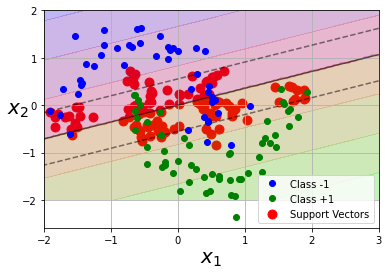

              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



In [45]:
# Your code here
svm_linear = MySVM(C = 1)
svm_linear.fit(X_train, y_train)
plot_svm(svm_linear, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


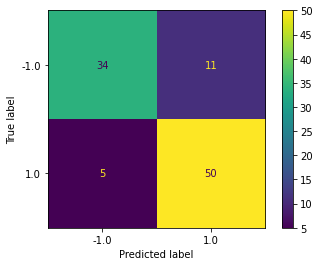

In [46]:
plot_confusion_matrix(svm_linear, X_test, y_test)

     pcost       dcost       gap    pres   dres
 0: -7.9337e+01 -7.1892e+01  2e+03  2e+01  3e-14
 1: -1.5482e+01 -6.6387e+01  2e+02  1e+00  3e-14
 2: -1.0118e+01 -3.6971e+01  4e+01  3e-01  7e-15
 3: -9.1998e+00 -1.5820e+01  9e+00  5e-02  3e-15
 4: -9.5809e+00 -1.1287e+01  2e+00  1e-02  2e-15
 5: -9.7959e+00 -1.0450e+01  8e-01  3e-03  2e-15
 6: -9.8823e+00 -1.0188e+01  4e-01  1e-03  2e-15
 7: -9.9303e+00 -1.0049e+01  1e-01  2e-04  2e-15
 8: -9.9662e+00 -9.9977e+00  3e-02  2e-16  2e-15
 9: -9.9807e+00 -9.9819e+00  1e-03  3e-16  2e-15
10: -9.9812e+00 -9.9813e+00  2e-05  2e-16  2e-15
11: -9.9813e+00 -9.9813e+00  2e-07  2e-16  2e-15
Optimal solution found.
113 support vectors out of 400 points


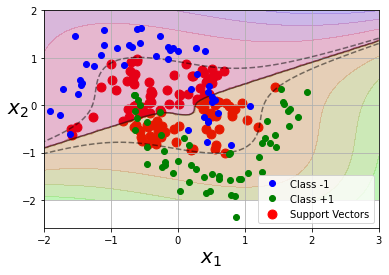

              precision    recall  f1-score   support

        -1.0       0.83      0.76      0.79        45
         1.0       0.81      0.87      0.84        55

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.82       100
weighted avg       0.82      0.82      0.82       100



In [47]:
svm_poly = MySVM(kernel = polynomial_kernel, C = 0.1)
svm_poly.fit(X_train, y_train)
plot_svm(svm_poly, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


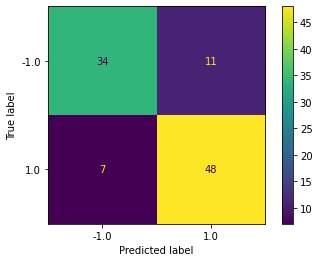

In [48]:
plot_confusion_matrix(svm_poly, X_test, y_test)

     pcost       dcost       gap    pres   dres
 0: -2.0529e+01 -5.9208e+02  2e+03  2e+00  6e-16
 1: -8.8604e+00 -2.7190e+02  3e+02  1e-15  6e-16
 2: -2.4639e+01 -6.2076e+01  4e+01  7e-16  5e-16
 3: -2.8626e+01 -3.6760e+01  8e+00  8e-16  4e-16
 4: -2.9644e+01 -3.1890e+01  2e+00  7e-16  3e-16
 5: -3.0036e+01 -3.0527e+01  5e-01  1e-15  3e-16
 6: -3.0124e+01 -3.0257e+01  1e-01  3e-15  3e-16
 7: -3.0149e+01 -3.0188e+01  4e-02  9e-16  3e-16
 8: -3.0158e+01 -3.0166e+01  8e-03  3e-16  3e-16
 9: -3.0161e+01 -3.0161e+01  6e-04  1e-15  3e-16
10: -3.0161e+01 -3.0161e+01  1e-05  5e-16  3e-16
Optimal solution found.
124 support vectors out of 400 points


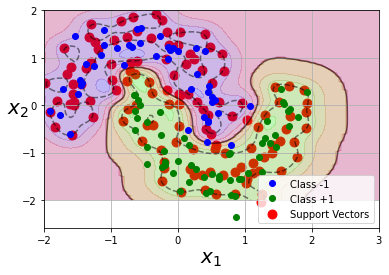

              precision    recall  f1-score   support

        -1.0       1.00      0.96      0.98        45
         1.0       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [49]:
svm_rbf = MySVM(kernel = rbf_kernel, C = 1)
svm_rbf.fit(X_train, y_train)
plot_svm(svm_rbf, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


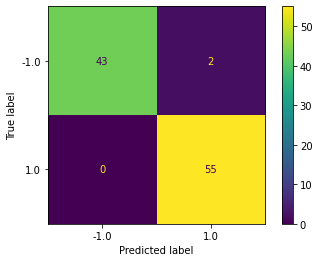

In [50]:
plot_confusion_matrix(svm_rbf, X_test, y_test)

Lets compare the performance of our implementation of svm with the built-in:

| Model      | Untuned | Tuned | Our Model 
| ----------- | ----------- | ---------- | ----------------|
| SVMLinear      | 0.87, 0.76, 0.82, 0.91       | 0.87, 0.76, 0.82, 0.91 | 0.87, 0.76, 0.82, 0.91 |
| SVMPoly   | 0.83, 0.76, 0.81, 0.87        | 0.85, 0.91, 0.92, 0.87 | 0.83, 0.76, 0.81, 0.87 |
| SVMRBF   |  1.0, 0.93, 0.95, 1.0     | 1.0, 0.96, 0.96, 1.0  | 1.0, 0.96, 0.96, 1.0 |



-1 prediction, -1 recall, 1 prediction, 1 recall

As we can see there is no difference between our model and the built-in for linear. This makes a lot of sense. There isn't much you can do with simple lines. So the lack of improvement between the tuned/untuned built-in model and no performance gap with our model is expected.

For the poly that I implemented, I decided against using a higher degree polynomial (used p=3) just because a higher p wouldn't give us significant performance gains as seen in the last section, a polynomial of degree 3 should be able to reasonably model the dataset given. 

And our RBF implementation with the optimal hyperparameters directly match the performance of the tuned default implementation. 

Now lets see if we can eke out any more performance from our implementation by using the optimal hyperparameters determined in the earlier section. 

In [51]:
svm_linear_optimized = MySVM(kernel = linear_kernel, C=10)
svm_poly_optimized = MySVM(kernel = polynomial_kernel, C=1)
svm_rbf_optimized = MySVM(kernel = rbf_kernel, C=1)

svm_linear_optimized.fit(X_train, y_train)
svm_poly_optimized.fit(X_train, y_train)
svm_rbf_optimized.fit(X_train, y_train)

     pcost       dcost       gap    pres   dres
 0: -7.3505e+02 -2.5436e+04  6e+04  6e-01  5e-14
 1: -6.3537e+02 -6.3106e+03  7e+03  3e-02  5e-14
 2: -7.2777e+02 -1.8571e+03  1e+03  4e-03  4e-14
 3: -8.7911e+02 -1.3212e+03  5e+02  1e-03  4e-14
 4: -9.2665e+02 -1.2208e+03  3e+02  8e-04  4e-14
 5: -9.6538e+02 -1.1447e+03  2e+02  4e-04  4e-14
 6: -9.9089e+02 -1.0977e+03  1e+02  2e-04  4e-14
 7: -1.0059e+03 -1.0693e+03  6e+01  1e-04  4e-14
 8: -1.0135e+03 -1.0543e+03  4e+01  6e-05  4e-14
 9: -1.0210e+03 -1.0420e+03  2e+01  2e-05  5e-14
10: -1.0229e+03 -1.0372e+03  1e+01  6e-06  5e-14
11: -1.0287e+03 -1.0303e+03  2e+00  2e-14  5e-14
12: -1.0294e+03 -1.0295e+03  9e-02  5e-15  5e-14
13: -1.0295e+03 -1.0295e+03  3e-02  1e-14  5e-14
14: -1.0295e+03 -1.0295e+03  4e-04  5e-15  5e-14
Optimal solution found.
105 support vectors out of 400 points
     pcost       dcost       gap    pres   dres
 0: -1.4405e+02 -9.7785e+02  5e+03  3e+00  7e-14
 1: -9.5249e+01 -6.3110e+02  1e+03  4e-01  4e-14
 2: -7.70

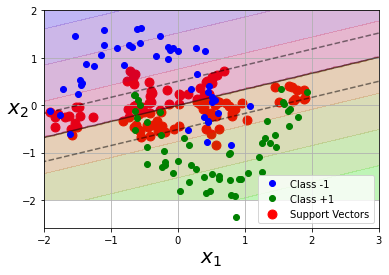

              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



In [52]:
plot_svm(svm_linear_optimized, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


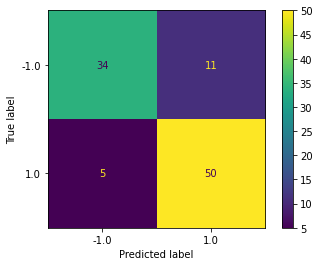

In [53]:
plot_confusion_matrix(svm_linear_optimized, X_test, y_test)

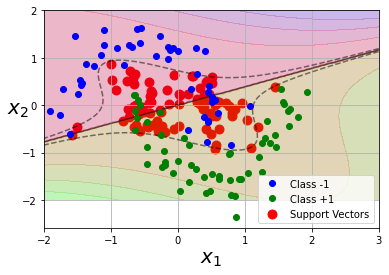

              precision    recall  f1-score   support

        -1.0       0.87      0.76      0.81        45
         1.0       0.82      0.91      0.86        55

    accuracy                           0.84       100
   macro avg       0.85      0.83      0.84       100
weighted avg       0.84      0.84      0.84       100



In [54]:
plot_svm(svm_poly_optimized, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


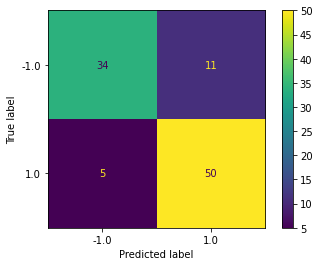

In [55]:
plot_confusion_matrix(svm_poly_optimized, X_test, y_test)

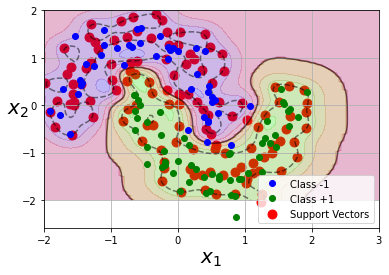

              precision    recall  f1-score   support

        -1.0       1.00      0.96      0.98        45
         1.0       0.96      1.00      0.98        55

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [56]:
plot_svm(svm_rbf_optimized, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


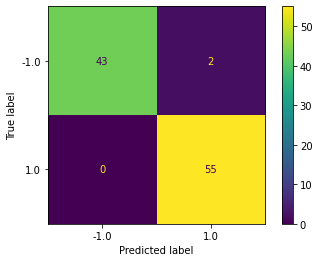

In [57]:
plot_confusion_matrix(svm_rbf_optimized, X_test, y_test)

| Model      | Untuned | Tuned | Our Model | Our Model Optimized
| ----------- | ----------- | ---------- | ----------------| ----------- |
| SVMLinear      | 0.87, 0.76, 0.82, 0.91       | 0.87, 0.76, 0.82, 0.91 | 0.87, 0.76, 0.82, 0.91 | 0.87, 0.76, 0.82, 0.91 
| SVMPoly   | 0.83, 0.76, 0.81, 0.87        | 0.85, 0.91, 0.92, 0.87 | 0.83, 0.76, 0.81, 0.87 | 0.87, 0.76, 0.82, 0.91
| SVMRBF   |  1.0, 0.93, 0.95, 1.0     | 1.0, 0.96, 0.96, 1.0  | 1.0, 0.96, 0.96, 1.0 |  1.0, 0.96, 0.96, 1.0

-1 prediction, -1 recall, 1 prediction, 1 recall

As we can see, we don't have any improvements in performance over the unoptimized models of our own implementation. I'm not exactly sure why that is. It could just be that in our case the C values don't matter enough to make a difference. Or to put it another way, the data is organized in such a way that changing the C values doesn't improve nor worsen the model's performance. 

Looking at the plots we have identical plots in all but the polynomial SVM. Where our optimized polynomial SVM (C=1) doesn't differ from the unoptimized versions of the built-in polynomial SVM. But upon further inspection, I realized that this is due to us being able to manipulate the Gamma value for our implementation which leaves us with slightly worse performance across the board for our polynomial SVM implementation.

And during manual testing changing the C to 1 for the custom SVM (differing from the built-in implementation's C=0.1) improved performance (for the polynomial custom SVM) bringing it more in-line with the optimized version of the polynomial SVM. 

In terms of models, the RBF SVM performed the best with polynomial next and linear last. 

##Assignment Reflection: 

This assignment differed significantly from prior assignments due to the heavy math/technical knowledge needed here. Even though all we really had to do was identify the support vectors and the corresponding coefficients, figuring out how to translate the high level math detailed in the textbook and slides into code was the real challenge here. 

I still don't understand all the math but I can see how we tie together multiple componenets of the underlying mathematics to generate a model. Like extracting the support vectors by ensuring a certain coefficient is non-zero is crazy. Like I know now that selecting support vectors via that decision metric is optimal but what was the theory and groundwork necessary to shape the math in such a way that such an elegant method of finding support vectors was found? 

Its stuff like that that interests me about ML. 

Also finding out what math to use made thsi assignment a lot more involved. I had to go to more sources than prior assignments (other school's lectures, papers, etc.) to find out how to implement what I needed to here. 

The craziest part about this algorithm is that we could solve our problem analytically, we didn't need to loop over anything (just about). It wasn't like GD where each iteration made us slightly better. 

## Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 6](https://drive.google.com/open?id=1CeBhepjDKBaFBq2BZq-zNQs-MC8ll7aL4qAF8TJ24FM) and [lecture 6b](https://drive.google.com/open?id=13BidUAs_c2QdZkf92axt2S748sbnbI9Hgxg-fzb-OuU) and/or the textbook
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 3:...".

Part of the codes used in this assignment is modified from Mathieu Blondel under the 3-Clause BSD License. Best of luck and have fun!